# VA Check

For households with at most three adults (drivers).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
va_order = ['zv', 'iv', 'sv']

input

In [3]:
csv_data = r'.\data\va_ac3_mpo_v0816.csv'

### counts

In [4]:
df = pd.read_csv(csv_data)

df

,mpo,va_ac3,num_households
0,BRMPO,NaN,91552
1,BRMPO,iv,263133
2,BRMPO,sv,762909
3,BRMPO,zv,197901
4,BRPC,NaN,2541
5,BRPC,iv,8484
6,BRPC,sv,40392
7,BRPC,zv,5051
8,CCC,NaN,5524
9,CCC,iv,11526


In [7]:

df['va'] = pd.Categorical(df['va_ac3'], categories=va_order, ordered=True)

pivot_df = df.pivot_table(index='mpo', columns='va', values='num_households', fill_value=0)

In [8]:
pivot_df

va,zv,iv,sv
mpo,,,
BRMPO,197901,263133,762909
BRPC,5051,8484,40392
CCC,4754,11526,79381
CMRPC,20504,33403,159579
FRCOG,2212,3856,23388
MRPC,6582,13871,71964
MVC,334,880,5384
MVPC,11219,21277,93303
NMCOG,8251,17220,77052


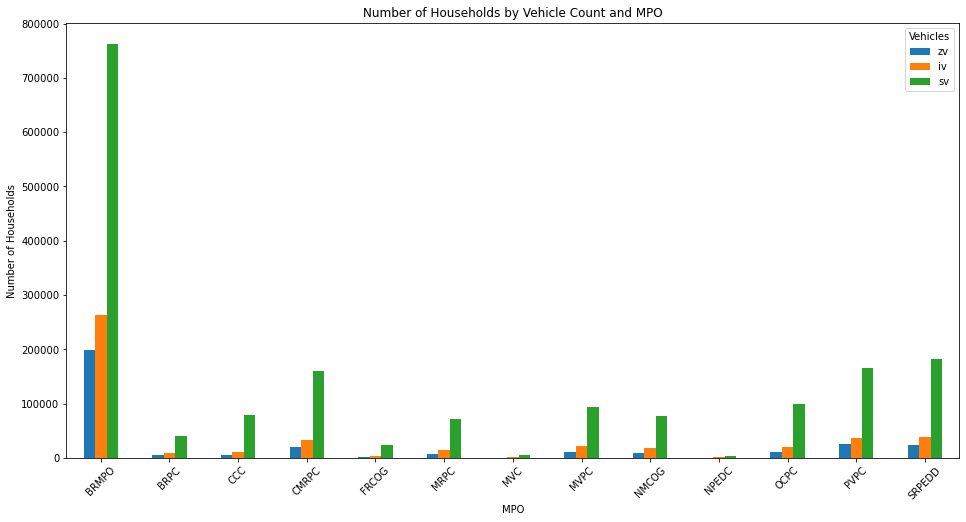

In [9]:

pivot_df.plot(kind='bar', figsize=(16, 8))
plt.title('Number of Households by Vehicle Availability and RPA')
plt.xlabel('RPA')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)  # Rotates the MPO labels to avoid overlap
plt.legend(title='Vehicles')
# plt.tight_layout() 

plt.show()


### percentage 

In [11]:
# Pivot the table to prepare for grouped percentage calculation
pct_pivot_df = df.pivot_table(index='mpo', columns='va', values='num_households', aggfunc='sum', fill_value=0)

# Convert numbers to percentages within each MPO
pct_pivot_df = pct_pivot_df.div(pct_pivot_df.sum(axis=1), axis=0) * 100

pct_pivot_df

va,zv,iv,sv
mpo,,,
BRMPO,16.169135,21.498795,62.332069
BRPC,9.366366,15.732379,74.901255
CCC,4.969632,12.048797,82.981570
CMRPC,9.604377,15.646459,74.749164
FRCOG,7.509506,13.090712,79.399783
MRPC,7.122066,15.009143,77.868790
MVC,5.062140,13.337375,81.600485
MVPC,8.918195,16.913489,74.168316
NMCOG,8.047950,16.796231,75.155819


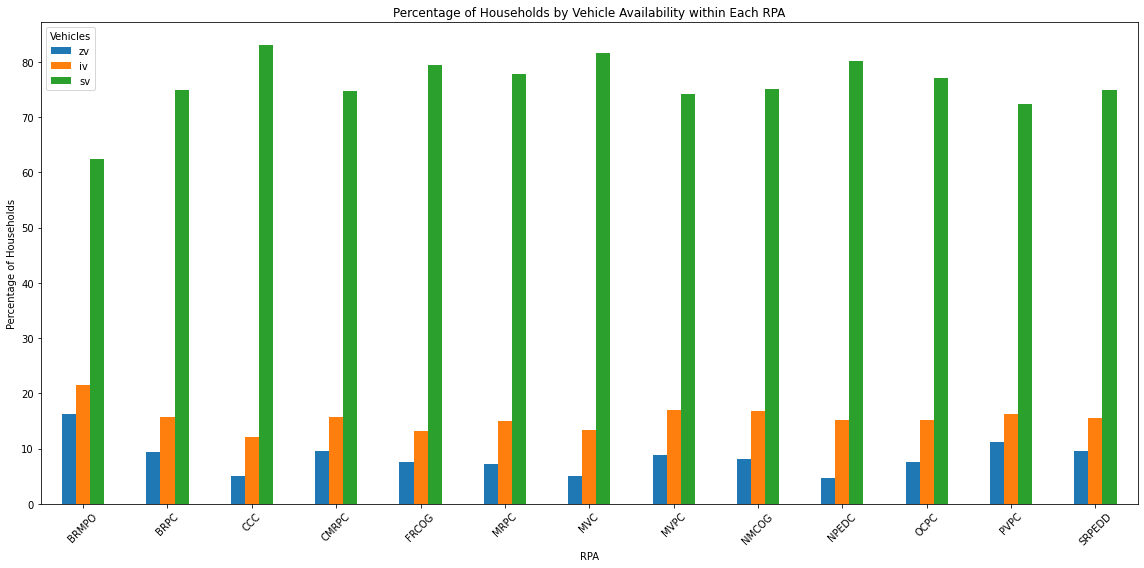

In [13]:

# Plotting the grouped bar chart in percentage
pct_pivot_df.plot(kind='bar', figsize=(16, 8)) #, colormap='viridis')
plt.title('Percentage of Households by Vehicle Availability within Each RPA')
plt.xlabel('RPA')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Vehicles')
plt.tight_layout()

# Display the plot
plt.show()
